<a href="https://colab.research.google.com/github/AnkeHooliganke/ml-course/blob/main/ananan/klustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Кластеризация пользователей по кинопредпочтениям на базе датасета Movielens с помощью алгоритма KMeans из библиотеки Scikit-learn

Выполнила студент 431 группы Алтынова Анна

шаг 0: импорт и вывод примеров данных

шаг 1: очистка данных: удаляем теги(их почти не ставят), таймстемпы, жанры, названия, удаляем фильмы, которым ставили рейтинг не больше 30 раз и пользователей, которые ставили рейтинг не больше 30 раз, NAN замещаем средними по колонке, объединяем нужные данные в один датафрейм

шаг 2: запускаем алгоритм кластеризации при k=10, выводим пример кластера

шаг 3: запускаем алгоритм на k от 1 до  30, 
для каждого k считаем "ошибку": сумма по кластерам средних квадратов отклонений от центра кластера (по пользователям из каждого кластера), представляем на графике

шаг 4: выводим пример кластера при k > 1 с минимальной "ошибкой"

результат: получили кластеризацию пользователей по кинопредпочтениям, то есть, в каждом кластере находятся пользователи, оценивающие каждый фильм похожим образом

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/movielens/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/movielens/ratings.csv')
tags = pd.read_csv('/content/drive/MyDrive/movielens/tags.csv')

In [ ]:
movies[:5]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
ratings[:5]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
len(ratings['userId'].unique())

610

In [ ]:
tags[:10]

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [ ]:
tags['tag'].value_counts()[:5]

In Netflix queue     131
atmospheric           36
superhero             24
thought-provoking     24
funny                 23
Name: tag, dtype: int64

In [ ]:
print('tags length: ', len(tags['tag']), '\nunique tags length: ', len(tags['tag'].unique()))

tags length:  3683 
unique tags length:  1589


In [ ]:
ratings= ratings.drop(columns=['timestamp'])

In [ ]:
ratings[:3]

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0


In [ ]:
movies = movies.drop(columns=['genres', 'title'])
movies[:3]

,movieId
0,1
1,2
2,3


In [ ]:
data = pd.merge(ratings, movies, on='movieId')


In [ ]:
data[data['userId']==1]

,userId,movieId,rating
0,1,1,4.0
215,1,3,4.0
267,1,6,4.0
369,1,47,5.0
572,1,50,5.0
...,...,...,...
16056,1,3744,4.0
16075,1,3793,5.0
16208,1,3809,4.0
16243,1,4006,4.0


In [ ]:
data1 = pd.pivot_table(data, index='userId', columns='movieId', values='rating')
data1[:10]

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,4.0,NaN,3.0,NaN,4.0,4.0,4.0,NaN,2.0,NaN,2.0,5.0,NaN,4.0,3.0,4.0,3.0,NaN,NaN,NaN,3.0,4.0,4.0,5.0,NaN,NaN,NaN,4.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movies30 = ratings['movieId'].value_counts()[ratings['movieId'].value_counts() > 30]
len(movies30)

860

In [ ]:
ratings30 = ratings[ratings['movieId'].isin(movies30.index)]

In [ ]:
ratings30[:2]

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0


In [ ]:
len(ratings30)

57358

In [ ]:
users30 = ratings30['userId'].value_counts()[ratings30['userId'].value_counts() > 30]
len(users30)
                  

429

In [ ]:
ratings30 = ratings30[ratings30['userId'].isin(users30.index)]
data2 = pd.merge(ratings30, movies, on='movieId')

In [ ]:
data2 = pd.pivot_table(data2, index='userId', columns='movieId', values='rating')
data2[:10]

movieId,1,2,3,5,6,7,10,11,16,17,19,21,22,25,29,31,32,34,36,39,44,45,47,48,50,58,60,62,65,70,95,104,110,111,112,135,141,145,150,151,...,81845,85414,86332,87232,88125,88129,88140,88163,89745,91500,91529,91542,91658,92259,96079,96610,97938,98809,99114,102125,104841,106782,108932,109374,109487,110102,111759,112552,112556,112852,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,5.0,3.0,NaN,3.0,4.0,4.0,5.0,NaN,NaN,3.0,4.0,NaN,1.0,NaN,4.0,4.0,3.0,NaN,4.0,4.0,5.0,NaN,4.0,3.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,5.0,NaN,3.0,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset_mean = data2.fillna(data2.mean())

In [ ]:
k_means = KMeans(n_clusters=10, random_state=0)

In [ ]:
labels = k_means.fit_predict(X=dataset_mean)

In [ ]:
labels

array([0, 9, 0, 0, 0, 0, 9, 0, 0, 9, 9, 0, 0, 9, 0, 9, 9, 0, 0, 0, 9, 0,
       0, 0, 0, 9, 9, 9, 0, 0, 5, 3, 0, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 0,
       0, 0, 0, 9, 0, 0, 0, 4, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 0, 0,
       0, 9, 9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 0, 0, 0, 0, 9, 0, 9, 0, 0,
       0, 0, 9, 0, 8, 0, 9, 9, 7, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       9, 9, 0, 0, 0, 0, 9, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0,
       0, 0, 9, 9, 0, 0, 9, 9, 0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 9, 0, 0, 9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9,
       0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 9, 9, 0, 9, 9, 9, 0, 0, 0, 0, 9, 1,
       0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 9, 0, 0, 0, 9, 9, 0, 0, 9, 0, 0, 0,
       0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 9, 9,
       9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 9, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 9, 0, 0,

In [ ]:
clusters = [[data2.index[i] for i in range(len(labels)) if labels[i] == j] for j in range(10)]

In [ ]:
clusters[2]

[600]

In [ ]:
data2[data2.index.isin(clusters[0])]

movieId,1,2,3,5,6,7,10,11,16,17,19,21,22,25,29,31,32,34,36,39,44,45,47,48,50,58,60,62,65,70,95,104,110,111,112,135,141,145,150,151,...,81845,85414,86332,87232,88125,88129,88140,88163,89745,91500,91529,91542,91658,92259,96079,96610,97938,98809,99114,102125,104841,106782,108932,109374,109487,110102,111759,112552,112556,112852,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,5.0,3.0,NaN,3.0,4.0,4.0,5.0,NaN,NaN,3.0,4.0,NaN,1.0,NaN,4.0,4.0,3.0,NaN,4.0,4.0,5.0,NaN,4.0,3.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,5.0,NaN,3.0,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,3.0,5.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,3.0,3.0,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,4.0,3.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,4.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,4.0,2.0,NaN,NaN,NaN,4.5,NaN,4.0,NaN,3.5,NaN,NaN,NaN,3.0,NaN,4.5,3.5,NaN,NaN,NaN,4.0,NaN,NaN,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
centers = k_means.cluster_centers_

In [ ]:
def error(data, clusters, centers): # NANs ignored
  errsum = 0
  for i in range(len(centers)):
    cluster_data = data[data.index.isin(clusters[i])]
    err = ((cluster_data - centers[i])**2).sum(axis=1).sum() / len(clusters[i])
    errsum += err
  return errsum


In [ ]:
error(data2, clusters, centers)

230.5456166290174

In [ ]:
errors = []
for k in range(1, 30):
  k_means = KMeans(n_clusters=k, n_init = 20, random_state=0)
  labels = k_means.fit_predict(X=dataset_mean)
  clusters = [[data2.index[i] for i in range(len(labels)) if labels[i] == j] for j in range(k)]
  centers = k_means.cluster_centers_
  err_k = error(data2, clusters, centers)
  errors.append(err_k)

In [ ]:
import matplotlib.pyplot as plt

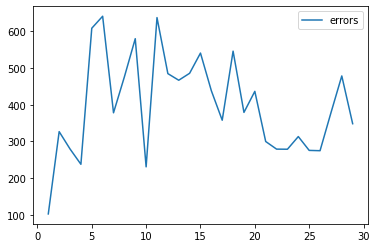

In [ ]:
plt.plot([i for i in range(1, 30)], errors, label='errors')
plt.legend()
plt.show()

In [ ]:
print(errors[9], min(errors[1:]), min(errors))

230.5456166290174 230.5456166290174 102.15020680752944


In [ ]:
k_means = KMeans(n_clusters=10,n_init=20, random_state=0) # n_clusters = index(min(errors)) + 1
labels = k_means.fit_predict(X=dataset_mean)
clusters = [[data2.index[i] for i in range(len(labels)) if labels[i] == j] for j in range(10)]
centers = k_means.cluster_centers_

In [ ]:
error(data2, clusters, centers)

230.5456166290174

In [ ]:
labels

array([0, 9, 0, 0, 0, 0, 9, 0, 0, 9, 9, 0, 0, 9, 0, 9, 9, 0, 0, 0, 9, 0,
       0, 0, 0, 9, 9, 9, 0, 0, 5, 3, 0, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 0,
       0, 0, 0, 9, 0, 0, 0, 4, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 0, 0,
       0, 9, 9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 0, 0, 0, 0, 9, 0, 9, 0, 0,
       0, 0, 9, 0, 8, 0, 9, 9, 7, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       9, 9, 0, 0, 0, 0, 9, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0,
       0, 0, 9, 9, 0, 0, 9, 9, 0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 9, 0, 0, 9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9,
       0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 9, 9, 0, 9, 9, 9, 0, 0, 0, 0, 9, 1,
       0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 9, 0, 0, 0, 9, 9, 0, 0, 9, 0, 0, 0,
       0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 9, 9,
       9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 9, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 9, 0, 0,

In [ ]:
data2[data2.index.isin(clusters[1])]

movieId,1,2,3,5,6,7,10,11,16,17,19,21,22,25,29,31,32,34,36,39,44,45,47,48,50,58,60,62,65,70,95,104,110,111,112,135,141,145,150,151,...,81845,85414,86332,87232,88125,88129,88140,88163,89745,91500,91529,91542,91658,92259,96079,96610,97938,98809,99114,102125,104841,106782,108932,109374,109487,110102,111759,112552,112556,112852,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
308,NaN,3.0,0.5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,4.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,3.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
